<a href="https://colab.research.google.com/github/oshmita26/Regression_analysis_model/blob/main/Regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!ls

drive  sample_data


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Module2_RegressionData.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,10.01,-0.360122,-0.645366,B,27,3,0.0,-0.805854,-3.640244,-0.358659,-7.809512,-0.050976,0.215642,0.009203,-7.009741
1,10.19,-0.380122,-0.465366,B,27,5,0.0,-0.465854,-2.930244,2.321341,-4.469512,-0.050976,0.215299,0.008860,8.890099
2,10.34,-0.440122,-0.315366,B,27,7,0.0,-0.155854,-2.320244,9.591341,-0.609512,-0.050976,0.214566,0.008127,-12.328341
3,10.25,-0.430122,-0.405366,B,27,8,0.0,0.034146,-1.960244,10.671341,0.940488,-0.040976,0.214130,0.007691,-5.528821
4,10.17,-0.390122,-0.485366,B,27,9,0.0,0.244146,-1.700244,0.111341,-1.089512,-0.040976,0.213691,0.007252,-9.550351


### Encoding the categorical variables here

In [6]:
df['X4'].value_counts()

B    74005
A    70495
D    63582
C    53315
J    47451
K    45391
P    43369
Q    40520
R    34677
S    33306
G    18960
E    18523
F    17149
H    16686
Name: X4, dtype: int64

In [7]:
## Find and replace
cleanup_nums = {"X4": {"A": 0, "B": 1, "C": 2, "D": 3,
                                  "E": 4, "F": 5, "G":6, "H": 7, "J": 8, "K": 9, "P": 10,"Q": 11, "R": 12, "S":13 }}
obj_df = df.replace(cleanup_nums)
obj_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,10.01,-0.360122,-0.645366,1,27,3,0.0,-0.805854,-3.640244,-0.358659,-7.809512,-0.050976,0.215642,0.009203,-7.009741
1,10.19,-0.380122,-0.465366,1,27,5,0.0,-0.465854,-2.930244,2.321341,-4.469512,-0.050976,0.215299,0.008860,8.890099
2,10.34,-0.440122,-0.315366,1,27,7,0.0,-0.155854,-2.320244,9.591341,-0.609512,-0.050976,0.214566,0.008127,-12.328341
3,10.25,-0.430122,-0.405366,1,27,8,0.0,0.034146,-1.960244,10.671341,0.940488,-0.040976,0.214130,0.007691,-5.528821
4,10.17,-0.390122,-0.485366,1,27,9,0.0,0.244146,-1.700244,0.111341,-1.089512,-0.040976,0.213691,0.007252,-9.550351


In [8]:
## Splitting the variables into dependent and independent variables
## X is the independent variable and Y is the dependent variable
X = obj_df.iloc[:, :-1]  ## Dataframe of independent variables
y = obj_df.iloc[:, -1]  ## Dataframe of dependent variables

## Transforming the y variable
y = np.expm1((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

# X_arr = ((np.asarray(X)).reshape(6,5))
# y_arr = ((np.asarray(y)).reshape(6,5))

# print(X_arr)
# print(y_arr)

### Creating the correlation heatmap in the dataframe

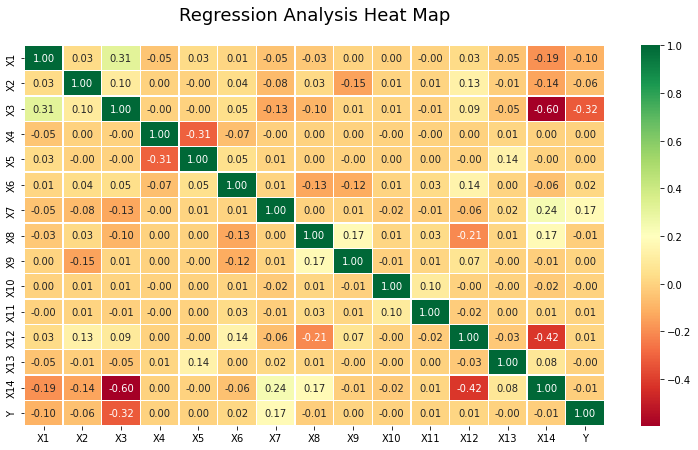

In [9]:
## Creating a data correlation heatmap using seaborn 
# Define the plot
fig, ax = plt.subplots(figsize=(13,7))
title = "Regression Analysis Heat Map"


plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

corr = obj_df.corr()
sns.heatmap(corr,annot=True,fmt="0.2f",cmap='RdYlGn',linewidths=0.30,ax=ax)
plt.show()

From the above correlation heatmap, we can observe some strong correlations between X3 and X14; X12 and X14; X3 and Y

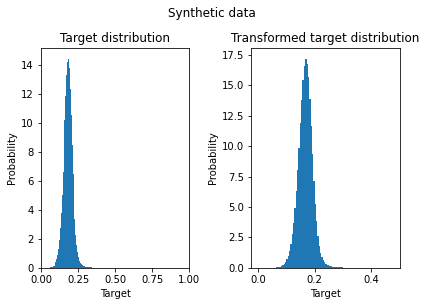

In [10]:
## Creating a histogram before and after transformation for the target distribution y
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.hist(y, bins=100, density=True)
ax0.set_xlim([0, 1])
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.set_title("Target distribution")

ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.set_title("Transformed target distribution")

f.suptitle("Synthetic data", y=1.05)
plt.tight_layout()

### Splitting of the Dataset

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rcv = RidgeCV()
rcv.fit(X_train, y_train)
y_pred = rcv.predict(X_test)
print(r2_score(y_test, y_pred))

ridge_cv_with_trans_target = TransformedTargetRegressor(
    regressor=RidgeCV(), func=np.log1p, inverse_func=np.expm1
).fit(X_train, y_train)
y_pred_ridge_with_trans_target = ridge_cv_with_trans_target.predict(X_test)

print(r2_score(y_test, y_pred_ridge_with_trans_target))

0.20095352404880473
0.20141292748901185


In [12]:
# Need to improve the accuracy


# **Accuracy Improvement**

# Tests

In [13]:
!pip install pandas-profiling[notebook, html]
!pip install autokeras
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

ERROR: Invalid requirement: 'pandas-profiling[notebook,'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.5/337.5 KB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 119.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.1 MB 21.7 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 117.6 MB/

In [14]:
!ls

drive  sample_data


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
import numpy as np
import autokeras as ak

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Module2_RegressionData.csv")
cleanup_nums = {"X4": {"A": 0, "B": 1, "C": 2, "D": 3,
                                  "E": 4, "F": 5, "G":6, "H": 7, "J": 8, "K": 9, "P": 10,"Q": 11, "R": 12, "S":13 }}
df = df.replace(cleanup_nums)

In [17]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
count,577429.000000,5.774290e+05,5.774290e+05,577429.000000,577429.000000,577429.000000,577429.000000,5.774290e+05,5.774290e+05,5.774290e+05,5.774290e+05,5.774290e+05,577429.000000,5.774290e+05,5.774290e+05
mean,10.883171,-7.412166e-13,4.261996e-12,5.677614,38.534145,43.428008,0.000004,-1.039090e-13,-2.407222e-12,5.853535e-12,-1.936169e-11,-2.634090e-12,0.200833,-1.038725e-11,6.262242e-12
std,1.324288,2.528702e-01,4.167188e-01,4.373891,25.765187,24.224261,0.000313,6.139679e-01,7.895312e-01,1.285517e+01,1.137305e+01,1.670116e-02,0.042103,3.423344e-03,5.231521e+00
min,7.180000,-6.560317e+00,-3.187170e+00,0.000000,1.000000,1.000000,-0.008543,-8.631695e+00,-8.695714e+00,-8.784689e+01,-7.908513e+01,-2.565854e-01,0.000000,-3.630949e-02,-3.355447e+01
25%,9.880000,-1.506154e-01,-2.565882e-01,1.000000,17.000000,23.000000,0.000000,-3.716867e-01,-4.184746e-01,-8.046866e+00,-7.175844e+00,-9.687500e-03,0.199698,-2.263795e-03,-3.199044e+00
50%,10.690000,1.369863e-03,-1.466667e-02,5.000000,34.000000,43.000000,0.000000,1.415094e-02,5.389831e-02,-1.123382e+00,-1.068286e+00,2.933333e-03,0.209141,-9.480000e-05,6.667756e-02
75%,11.460000,1.560000e-01,2.455263e-01,10.000000,56.000000,64.000000,0.000000,3.793151e-01,4.915385e-01,6.175946e+00,5.400339e+00,1.136364e-02,0.216218,1.970060e-03,3.170693e+00
max,23.090000,5.390678e+00,9.001081e+00,13.000000,97.000000,90.000000,0.013099,1.054103e+01,1.067456e+01,8.537612e+01,7.963889e+01,2.265116e-01,0.249235,3.012240e-02,6.170659e+01


In [18]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [19]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'Y'],
      dtype='object')

In [20]:
Y = df["Y"]
X = df.drop(['Y'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
clf = ak.StructuredDataRegressor(max_trials=5, loss = 'mean_absolute_error')
history = clf.fit(X_train, y_train, epochs=10)
r2_score(y_test, clf.predict(X_test))

Trial 5 Complete [00h 12m 35s]
val_loss: 0.03799569606781006

Best val_loss So Far: 0.03580300509929657
Total elapsed time: 01h 27m 34s
Epoch 1/10
13534/13534 [==============================] - 48s 3ms/step - loss: 0.0386 - mean_squared_error: 0.0027
Epoch 2/10
13534/13534 [==============================] - 46s 3ms/step - loss: 0.0363 - mean_squared_error: 0.0023
Epoch 3/10
13534/13534 [==============================] - 46s 3ms/step - loss: 0.0360 - mean_squared_error: 0.0022
Epoch 4/10
13534/13534 [==============================] - 45s 3ms/step - loss: 0.0359 - mean_squared_error: 0.0022
Epoch 5/10
13534/13534 [==============================] - 44s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0022
Epoch 6/10
13534/13534 [==============================] - 47s 3ms/step - loss: 0.0357 - mean_squared_error: 0.0022
Epoch 7/10
13534/13534 [==============================] - 46s 3ms/step - loss: 0.0356 - mean_squared_error: 0.0022
Epoch 8/10
13534/13534 [==============================] - 4

4512/4512 [==============================] - 12s 3ms/step


0.2637600745740113